In [5]:
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.setrecursionlimit(10000)
np.set_printoptions(suppress=True)

def quarterback_method(vector):
    '''
    四分位法
    :param vector:
    :return:
    '''
    lower_q = np.quantile(vector, 0.25, interpolation='lower')  # 下四分卫数
    higher_q = np.quantile(vector, 0.75, interpolation='higher')  # 上四分位数
    middle_q = np.median(vector)  # 中位数
    int_r = higher_q - lower_q  # 四分位距
    numbers = [lower_q, middle_q, higher_q, int_r]  # 分位数整理
    data = [vector[vector < i] for i in numbers][:-1]  # 前75%分位的数
    new_data = np.setdiff1d(vector, np.hstack((data[1], data[2])))  # 后25分位的数
    return numbers, data + [new_data]  # 分位数和四分位后的数据


def K_point(number):
    '''
    随机选择K中心
    :param number:
    :return:
    '''
    K = lambda: data[np.random.randint(len(data))]
    return [np.array(K())[0] for i in range(number)]

def random_point(number):
    '''
    随机选择K中心
    :param number:
    :return:
    '''
    K = lambda: data[np.random.randint(len(data))]
    return [np.array(K())[0] for i in range(number)]


def euclidean_distance(pointA, pointB):
    '''
    欧式距离计算公式
    :param pointA:
    :param pointB:
    :return:
    '''
    return np.array(np.sqrt(np.dot(np.power((pointA - pointB), 2), np.ones(2))))[0]


def mean_point(dataset):
    '''
    求中心点
    :param dataset:
    :return:
    '''
    #x_mean = np.array(sum(dataset[:, 0:1]) / len(dataset))[0, 0]
    #y_mean = np.array(sum(dataset[:, -1:]) / len(dataset))[0, 0]
    x_mean = (np.squeeze(np.array(dataset[:,0:1]))/len(dataset)).sum()
    y_mean = (np.squeeze(np.array(dataset[:,-1:]))/len(dataset)).sum()
    return np.array([x_mean, y_mean])


def error_sum_of_squares(new_K, old_K):
    '''
    误差平方和
    :param data:
    :param K:
    :return:
    '''
    return ((old_K - new_K) ** 2).sum()


def K_means(dataset, K_point, restart=0):
    '''标准计算循环完成K-means,误差平方和版本'''
    print('restart', restart)
    #print(mean_point(dataset),dataset)
    #the_original_error = error_sum_of_squares(np.array(K_point), )

    expr1 = [(np.array(i)[0], [euclidean_distance(j, np.array(i)) for j in K_point]) for i in dataset]

    NK = -1
    classified_of_data = []
    new_K_point = []
    for kindex in range(len(K_point)):
        NK += 1
        kindex = []
        for i in range(len(expr1)):
            Name = expr1[i][-1].index(min(expr1[i][-1]))
            data = list(np.array(dataset[i])[0])  # 最近的点的下标
            if Name == NK:
                kindex.append(data)
            else:
                pass

        new_K_point.append(mean_point(np.mat(kindex)))  # 新的k点整理数据结构
        classified_of_data.append(np.mat(kindex))

    error_sum_of_squares = sum([((mean_point(i)-j)**2).sum() for i,j in zip(classified_of_data,K_point)]) #误差平方和

    if error_sum_of_squares == 0 : # 如果不满足分类条件，则递归继续
        print('Ok , K-means 平方误差和版')
        return np.array(new_K_point), classified_of_data
    else:
        restart += 1
        return K_means(dataset, new_K_point, restart)


def K_means_run(class_number, all_datas, drawing=False):
    '''
    误差平方和版本
    :param class_number:
    :param all_datas:
    :param drawing:
    :return:
    '''
    k_of_constant = K_point(class_number)
    result = K_means(all_datas, k_of_constant, 0)

    if drawing == True:
        for data, k in zip(result[-1], result[0]):
            x, y = np.squeeze(np.array(data[:, 0:1])), np.squeeze(np.array(data[:, -1:]))  # ,
            plt.scatter(x, y)
            plt.scatter(k[0], k[-1], c='black', marker='x', alpha=1.0)
        plt.show()
        plt.close()
    else:
        pass
    return result

In [2]:
data = np.mat([[0.0, 7.8031236401009165], [0.1, 4.426411521373964], [0.2, 8.947706236035394], [0.3, 8.200555461071133], [0.4, 0.5142706050449086], [0.5, 3.1008492860590753], [0.6, 7.1785370142703], [0.7, 3.872126889453009], [0.8, 1.025577102380758], [0.9, 4.833507884197839], [1.0, 0.9345186488455648], [1.1, 4.812032669803522], [1.2, 3.4191665496674375], [1.3, 0.022961590431520573], [1.4, 0.8785497842851486], [1.5, 3.2381682303766004], [1.6, 6.663617230163021], [1.7, 0.9093960835056158], [1.8, 3.680521995791508], [1.9, 4.900535080573809], [2.0, 0.5937324344804573], [2.1, 7.783916463844781], [2.2, 7.11179421378249], [2.3, 2.4446164389372083], [2.4, 0.31413070861756043], [2.5, 8.793728586574554], [2.6, 5.826793655403399], [2.7, 5.694595209349293], [2.8, 1.810999124588204], [2.9, 2.5891746519869896], [3.0, 7.989527941362203], [3.1, 3.8888255411877237], [3.2, 6.980965568743198], [3.3, 6.183466511452052], [3.4, 8.994788345820844], [3.5, 7.713561865457374], [3.6, 5.373007398355321], [3.7, 5.857041801728861], [3.8, 1.2873991273003293], [3.9, 7.90280175406894], [4.0, 2.114965228889154], [4.1, 1.9122653164064485], [4.2, 1.430294828685612], [4.3, 6.447866312224862], [4.4, 1.6034730966952893], [4.5, 5.020523561692603], [4.6, 8.434230931666896], [4.7, 8.926232142246732], [4.8, 7.21575735052221], [4.9, 0.8242497089572909], [5.0, 3.2773727950676923], [5.1, 4.789459791385374], [5.2, 5.7771008824695205], [5.3, 5.475006081618368], [5.4, 0.1095089272289862], [5.5, 3.708028945757401], [5.6, 5.868541457709577], [5.7, 3.82129152340557], [5.8, 4.672995214563882], [5.9, 7.139883221140032], [6.0, 1.9266318905278135], [6.1, 8.37752018393436], [6.2, 0.38698741212173093], [6.3, 6.809020238683873], [6.4, 6.7650503938175754], [6.5, 3.622205528236381], [6.6, 6.2275067570806755], [6.7, 9.272360909999943], [6.8, 6.937813473353321], [6.9, 6.719818328095723], [7.0, 4.1761213627699085], [7.1, 2.2186584343523554], [7.2, 4.325155968720139], [7.3, 6.346030576482492], [7.4, 6.681255604404174], [7.5, 0.9022441439624651], [7.6, 3.5585144004608313], [7.7, 3.0389210408048797], [7.8, 1.2906111157619915], [7.9, 5.5836998346201785], [8.0, 9.35888445552132], [8.1, 7.895786013311998], [8.2, 8.908751780051233], [8.3, 0.5462991244242466], [8.4, 5.430329386519083], [8.5, 5.632137779391064], [8.6, 8.919006991403911], [8.7, 1.881419639976668], [8.8, 0.8227664012604219], [8.9, 6.551076298674367], [9.0, 0.8128558657766949], [9.1, 3.8227215510033807], [9.2, 5.628006555285536], [9.3, 7.4386834204408645], [9.4, 3.7984910271263073], [9.5, 4.012712837404079], [9.6, 9.755417444517088], [9.7, 2.8443889672100973], [9.8, 4.143513529213513], [9.9, 4.093044136223663]])


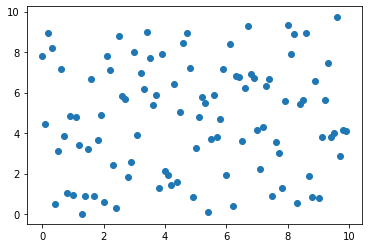

In [3]:
plt.scatter(np.squeeze(np.array(data[:, 0:1])), np.squeeze(np.array(data[:, -1:])))
plt.show()
plt.close()


restart 0
restart 1
restart 2
restart 3
restart 4
restart 5
restart 6
restart 7
Ok , K-means 平方误差和版


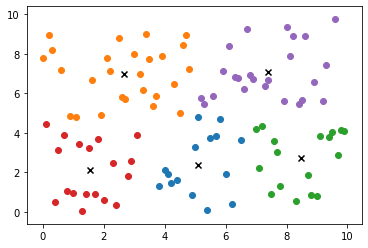

restart 0
restart 1
restart 2
restart 3
restart 4
restart 5
restart 6
Ok , K-means 平方误差和版


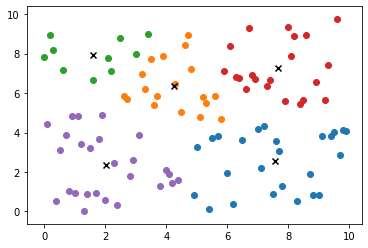

(array([[7.572     , 2.55858865],
        [4.24444444, 6.34221931],
        [1.59      , 7.94672951],
        [7.67142857, 7.25609713],
        [2.01153846, 2.32917194]]),
 [matrix([[4.9       , 0.82424971],
          [5.        , 3.2773728 ],
          [5.4       , 0.10950893],
          [5.5       , 3.70802895],
          [5.7       , 3.82129152],
          [6.        , 1.92663189],
          [6.2       , 0.38698741],
          [6.5       , 3.62220553],
          [7.        , 4.17612136],
          [7.1       , 2.21865843],
          [7.2       , 4.32515597],
          [7.5       , 0.90224414],
          [7.6       , 3.5585144 ],
          [7.7       , 3.03892104],
          [7.8       , 1.29061112],
          [8.3       , 0.54629912],
          [8.7       , 1.88141964],
          [8.8       , 0.8227664 ],
          [9.        , 0.81285587],
          [9.1       , 3.82272155],
          [9.4       , 3.79849103],
          [9.5       , 4.01271284],
          [9.7       , 2.84438897],


In [4]:
K_means_run(5,data,True)
K_means_run(5,data,True)